In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
pd.set_option('display.max_columns', None)

In [58]:
## Players features dataset
features_df = pd.read_csv('data/CollegeBasketballPlayers2009-2021.csv')

drafted_df = pd.read_excel('data/DraftedPlayers2009-2021.xlsx')
drafted_df.columns = ['player_name','team','affiliation','year','round','round_1_pick','overall_pick']
drafted_df = drafted_df.drop(0, axis=0)

df = pd.merge(features_df, drafted_df, on=['player_name','year'], how='left')

df['overall_pick'] = np.where(df['pick'].isnull()==False, df['overall_pick'], 0)

df['first_round_drafted'] = np.where((df['overall_pick']<=30) & (df['overall_pick']>0), 1, 0)
df['second_round_drafted'] = np.where((df['overall_pick']<=60) & (df['overall_pick']>30), 1, 0)

df = df.drop(['round','round_1_pick','overall_pick'], axis=1)

/var/folders/8r/k5yvmgxd5674477xypwpv4lw0000gn/T/ipykernel_91982/1054391887.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  features_df = pd.read_csv('data/CollegeBasketballPlayers2009-2021.csv')


In [59]:
df = df.drop(['team_y', 'affiliation', 'pick'], axis=1)

In [60]:
df = df.rename(columns = {'Unnamed: 64' : 'role', "team_x" : "team"})
df = df.drop('Unnamed: 65', axis=1)

<AxesSubplot:>

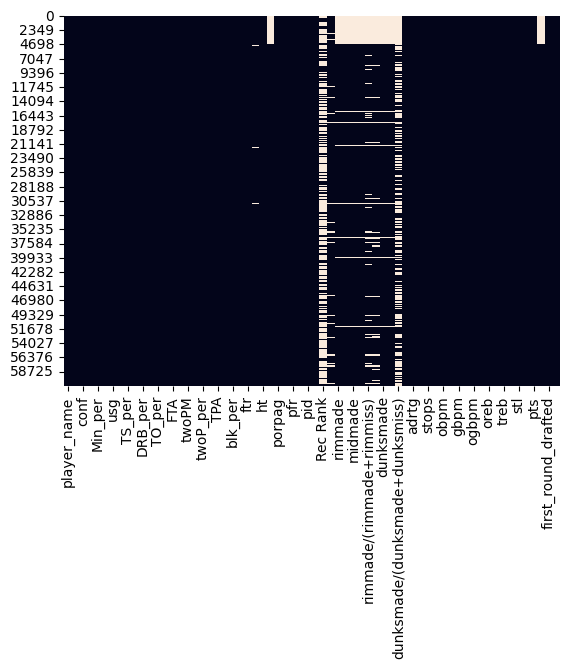

In [61]:
sns.heatmap(df.isnull(), cbar=False)

<AxesSubplot:>

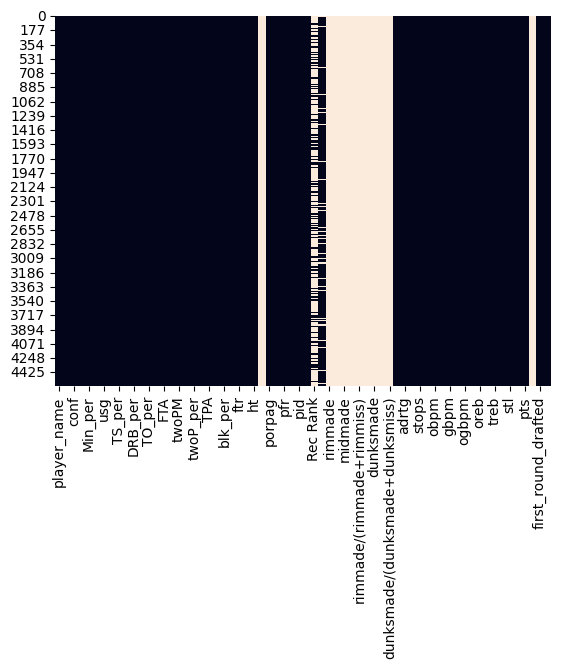

In [62]:
df_2009 = df[df.year == 2009]
sns.heatmap(df_2009.isnull(), cbar=False)

<AxesSubplot:>

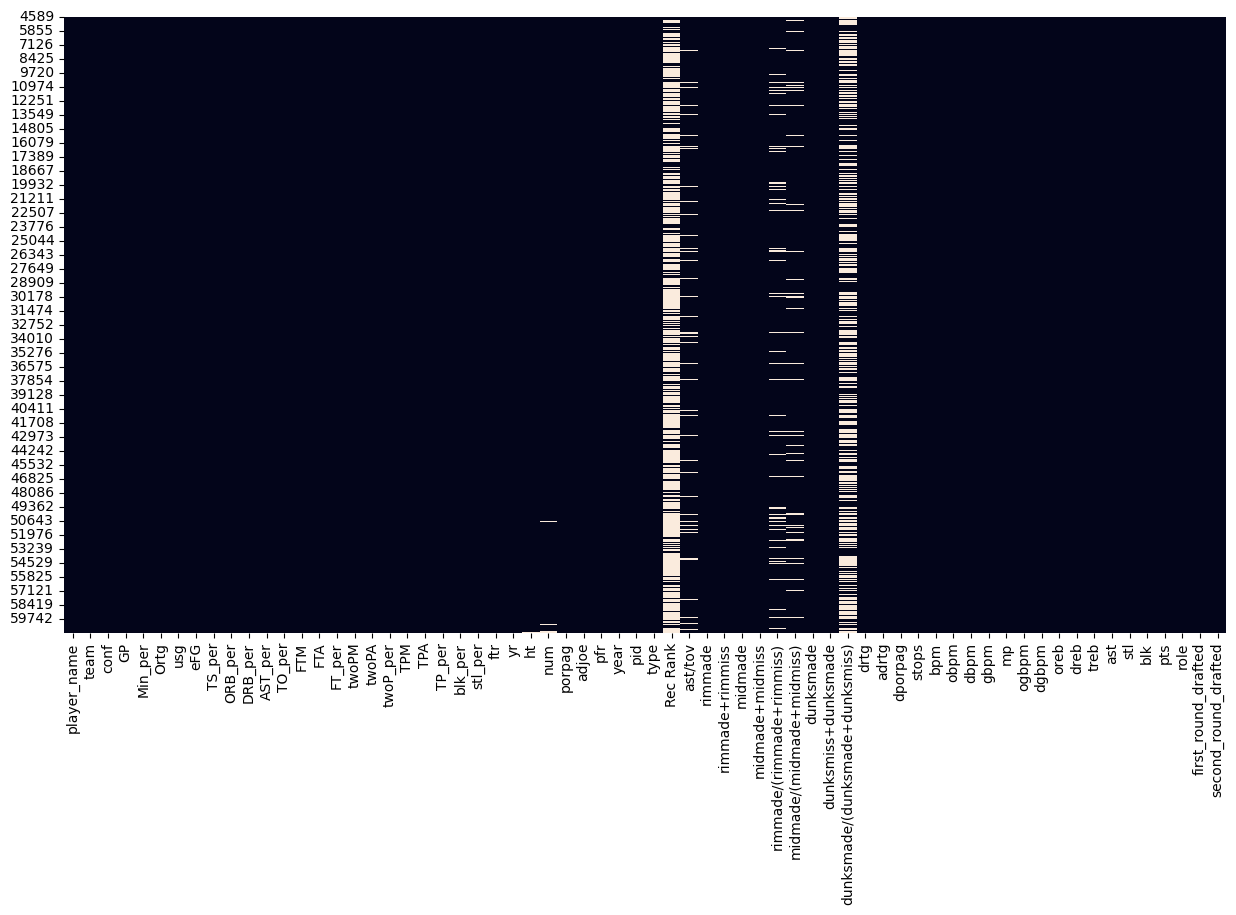

In [63]:
df = df[df.year != 2009]
df = df.dropna(thresh=len(df.columns) - 9)
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(), cbar=False)

In [64]:
df = df.drop(["Rec Rank", "dunksmade/(dunksmade+dunksmiss)"], axis=1)

In [65]:
df.columns[df.isnull().any()].tolist()

['yr',
 'ht',
 'num',
 'ast/tov',
 'rimmade',
 'rimmade+rimmiss',
 'midmade',
 'midmade+midmiss',
 'rimmade/(rimmade+rimmiss)',
 'midmade/(midmade+midmiss)',
 'dunksmade',
 'dunksmiss+dunksmade',
 'role']

In [66]:
df.yr.value_counts()

yr
Jr      14687
Fr      14299
So      12966
Sr      12621
57.1        1
0           1
42.9        1
Name: count, dtype: int64

In [67]:
df = df[df['yr'].isin(["Fr", "So", "Jr", "Sr"])]
df['yr'] = df['yr'].map({"Fr": 1, "So": 2, "Jr": 3, "Sr": 4})

In [68]:
df.ht.value_counts()

ht
7-Jun     5544
8-Jun     5399
5-Jun     5291
4-Jun     5280
6-Jun     5080
3-Jun     5023
2-Jun     4510
9-Jun     3985
1-Jun     3355
Jun-00    2823
10-Jun    2517
11-May    1390
10-May    1242
11-Jun    1127
Jul-00     671
9-May      546
8-May      216
1-Jul      205
7-May       88
2-Jul       85
3-Jul       39
6-May       36
-           27
Apr-00      16
4-Jul       12
6-Jul        7
5-May        6
2-May        4
4-May        4
5-Jul        3
0            1
1-May        1
3-May        1
5-Apr        1
Name: count, dtype: int64

In [69]:
def split_letters_numbers(s):
    letters = ''.join(re.findall("[a-zA-Z]+", s))
    numbers = ''.join(re.findall("[0-9]+", s))
    return letters, numbers

df['ht'] = df['ht'].fillna(method='ffill')

df[['ht_month', 'ht_day']] = df['ht'].astype(str).apply(lambda x: pd.Series(split_letters_numbers(x)))

In [70]:
df.num.value_counts()

num
1.0      2597
5.0      2466
3.0      2432
2.0      2411
0.0      2215
         ... 
99.0        2
99          1
4A          1
31/24       1
26.0        1
Name: count, Length: 77, dtype: int64

In [71]:
def get_number(s):
    return re.findall(r'[A-Za-z]+|\d+', s)[0]

df['num'] = df['num'].astype(str).apply(lambda x: pd.Series(get_number(x)))

In [72]:
df['num'] = pd.to_numeric(df['num'], errors='coerce')

In [73]:
df = df.dropna(subset=['num'])

In [74]:
df['role'].value_counts()

role
Wing G        12354
PF/C           8945
Combo G        8902
C              7887
Scoring PG     5784
Wing F         4905
Stretch 4      3181
Pure PG        2485
Name: count, dtype: int64

In [75]:
df.role.isnull().sum()

5

In [76]:
df = df.dropna(subset=['role'])

In [77]:
df = df.fillna(0)

<AxesSubplot:>

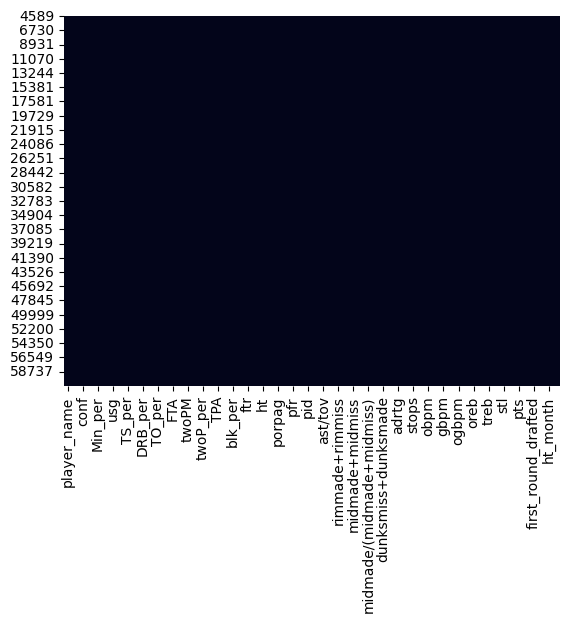

In [78]:
sns.heatmap(df.isnull(), cbar=False)

In [79]:
df.isnull().sum().sum()

0

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54443 entries, 4589 to 61057
Data columns (total 66 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_name                54443 non-null  object 
 1   team                       54443 non-null  object 
 2   conf                       54443 non-null  object 
 3   GP                         54443 non-null  int64  
 4   Min_per                    54443 non-null  float64
 5   Ortg                       54443 non-null  float64
 6   usg                        54443 non-null  float64
 7   eFG                        54443 non-null  float64
 8   TS_per                     54443 non-null  float64
 9   ORB_per                    54443 non-null  float64
 10  DRB_per                    54443 non-null  float64
 11  AST_per                    54443 non-null  float64
 12  TO_per                     54443 non-null  float64
 13  FTM                        54443 non-null  int64

In [81]:
object_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

In [82]:
len(df.columns) == len(numerical_cols) + len(object_cols)

True

In [83]:
object_cols

['player_name', 'team', 'conf', 'ht', 'type', 'role', 'ht_month', 'ht_day']

In [84]:
#maybe frequency encoding for team?
#df = df.drop(['player_name', 'team', 'conf', 'ht', 'type'], axis=1)
df = df.drop(['player_name', 'conf', 'ht', 'type'], axis=1)

In [85]:
#frequency encoding + onehot for most popular wont work since too many duplicates, one hot directly, but creates a lot of new columns
from collections import Counter
frequency = Counter(df['team'].value_counts().tolist())
elements_more_than_once = [number for number, count in frequency.items() if count > 1]

same_vc = []

team_value_counts = df['team'].value_counts().to_dict()
teams = df.team.unique().tolist()
values_set = set(team_value_counts.values())
 
for team in teams:
    if team_value_counts[team] in elements_more_than_once:
        same_vc.append(team)

len(same_vc)

336

In [86]:
df.ht_month.unique().tolist()

['Jun', 'May', 'Jul', 'Apr', '']

In [87]:
df = df[df['ht_month'] != ""]

In [88]:
df.ht_day.unique().tolist()

['3', '2', '5', '4', '11', '7', '6', '10', '8', '9', '00', '1']

In [89]:
one_hot_cols = ['role', 'ht_month', 'ht_day', 'team']

In [90]:
for col in numerical_cols:
    num_unique = df[col].nunique()
    if num_unique <= 25:
        print(f"{col}: {num_unique}")

yr: 4
year: 12
first_round_drafted: 2
second_round_drafted: 2


In [91]:
df.yr.value_counts()
#leave like this since ordinal structure

yr
3    14649
1    14231
2    12939
4    12598
Name: count, dtype: int64

In [92]:
df.year.value_counts()

year
2021    4636
2017    4606
2016    4580
2020    4574
2019    4570
2018    4563
2015    4559
2014    4528
2010    4512
2013    4433
2011    4429
2012    4427
Name: count, dtype: int64

In [93]:
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [94]:
bol_cols = df.select_dtypes(include=['bool']).columns.tolist()

In [95]:
df[bol_cols] = df[bol_cols].apply(lambda x: x.astype(int))

In [96]:
df = df.reset_index(drop=True)
df.shape

(54417, 440)

In [97]:
year_cols = [col for col in df.columns if col.startswith('year_')]

In [98]:
df_2021 = df[df['year']==2021]
df_2021 = df_2021.drop('year', axis=1)

#find a way to keep this data?
df = df[df['year']!=2021]
df = df.drop('year', axis=1)

In [99]:
print(df_2021.shape)
print(df.shape)

(4636, 439)
(49781, 439)


In [100]:
df.head()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,num,porpag,adjoe,pfr,pid,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,first_round_drafted,second_round_drafted,role_Combo G,role_PF/C,role_Pure PG,role_Scoring PG,role_Stretch 4,role_Wing F,role_Wing G,ht_month_Jul,ht_month_Jun,ht_month_May,ht_day_1,ht_day_10,ht_day_11,ht_day_2,ht_day_3,ht_day_4,ht_day_5,ht_day_6,ht_day_7,ht_day_8,ht_day_9,team_Air Force,team_Akron,team_Alabama,team_Alabama A&M,team_Alabama St.,team_Albany,team_Alcorn St.,team_American,team_Appalachian St.,team_Arizona,team_Arizona St.,team_Arkansas,team_Arkansas Little Rock,team_Arkansas Pine Bluff,team_Arkansas St.,team_Army,team_Auburn,team_Austin Peay,team_BYU,team_Ball St.,team_Baylor,team_Bellarmine,team_Belmont,team_Bethune Cookman,team_Binghamton,team_Boise St.,team_Boston College,team_Boston University,team_Bowling Green,team_Bradley,team_Brown,team_Bryant,team_Bucknell,team_Buffalo,team_Butler,team_Cal Baptist,team_Cal Poly,team_Cal St. Bakersfield,team_Cal St. Fullerton,team_Cal St. Northridge,team_California,team_Campbell,team_Canisius,team_Centenary,team_Central Arkansas,team_Central Connecticut,team_Central Michigan,team_Charleston Southern,team_Charlotte,team_Chattanooga,team_Chicago St.,team_Cincinnati,team_Clemson,team_Cleveland St.,team_Coastal Carolina,team_Colgate,team_College of Charleston,team_Colorado,team_Colorado St.,team_Columbia,team_Connecticut,team_Coppin St.,team_Cornell,team_Creighton,team_Dartmouth,team_Davidson,team_Dayton,team_DePaul,team_Delaware,team_Delaware St.,team_Denver,team_Detroit,team_Dixie St.,team_Drake,team_Drexel,team_Duke,team_Duquesne,team_East Carolina,team_East Tennessee St.,team_Eastern Illinois,team_Eastern Kentucky,team_Eastern Michigan,team_Eastern Washington,team_Elon,team_Evansville,team_FIU,team_Fairfield,team_Fairleigh Dickinson,team_Florida,team_Florida A&M,team_Florida Atlantic,team_Florida Gulf Coast,team_Florida St.,team_Fordham,team_Fort Wayne,team_Fresno St.,team_Furman,team_Gardner Webb,team_George Mason,team_George Washington,team_Georgetown,team_Georgia,team_Georgia Southern,team_Georgia St.,team_Georgia Tech,team_Gonzaga,team_Grambling St.,team_Grand Canyon,team_Green Bay,team_Hampton,team_Hartford,team_Harvard,team_Hawaii,team_High Point,team_Hofstra,team_Holy Cross,team_Houston,team_Houston Baptist,team_Howard,team_IPFW,team_IUPUI,team_Idaho,team_Idaho St.,team_Illinois,team_Illinois Chicago,team_Illinois St.,team_Incarnate Word,team_Indiana,team_Indiana St.,team_Iona,team_Iowa,team_Iowa St.,team_Jackson St.,team_Jacksonville,team_Jacksonville St.,team_James Madison,team_Kansas,team_Kansas St.,team_Kennesaw St.,team_Kent St.,team_Kentucky,team_LIU Brooklyn,team_LSU,team_La Salle,team_Lafayette,team_Lamar,team_Lehigh,team_Liberty,team_Lipscomb,team_Little Rock,team_Long Beach St.,team_Longwood,team_Louisiana Lafayette,team_Louisiana Monroe,team_Louisiana Tech,team_Louisville,team_Loyola Chicago,team_Loyola MD,team_Loyola Marymount,team_Maine,team_Manhattan,team_Marist,team_Marquette,team_Marshall,team_Maryland,team_Maryland Eastern Shore,team_Massachusetts,team_McNeese St.,team_Memphis,team_Mercer,team_Merrimack,team_Miami FL,team_Miami OH,team_Michigan,team_Michigan St.,team_Middle Tennessee,team_Milwaukee,team_Minnesota,team_Mississippi,team_Mississippi St.,team_Mississippi Valley St.,team_Missouri,team_Missouri St.,team_Monmouth,team_Montana,team_Montana St.,team_Morehead St.,team_Morgan St.,team_Mount St. Mary's,team_Murray St.,team_NJIT,team_Navy,team_Nebraska,team_Nebraska Omaha,team_Nevada,team_New Hampshire,team_New Mexico,team_New Mexico St.,team_New Orleans,team_Niagara,team_Nicholls St.,team_Norfolk St.,team_North Alabama,team_North Carolina,team_North Carolina A&T,

In [101]:
df.to_csv('df.csv', index=False)
df_2021.to_csv('df_2021.csv', index=False)


In [102]:
df = pd.read_csv("df.csv")
df_2021 = pd.read_csv("df_2021.csv")

In [103]:
df = df.drop("second_round_drafted", axis=1)
df_2021 = df_2021.drop("second_round_drafted", axis=1)

In [104]:
print(df_2021.shape)
print(df.shape)

(4636, 438)
(49781, 438)


In [105]:
df.first_round_drafted.value_counts()

first_round_drafted
0    49519
1      262
Name: count, dtype: int64

In [106]:
df_all = df

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb

In [108]:
probs = []

for state in range(0,100):
    df = df_all.sample(15625, random_state=state)

    train_df, val_df = train_test_split(df, test_size=0.2, random_state=state, stratify=df['first_round_drafted'])
    train_df, final_val_df = train_test_split(train_df, test_size=0.2, random_state=state, stratify=train_df['first_round_drafted'])

    scaler = MinMaxScaler()

    cols = df.columns.tolist()
    test_df = df_2021

    train_df[cols] = scaler.fit_transform(train_df[cols])
    val_df[cols] = scaler.transform(val_df[cols])
    final_val_df[cols] = scaler.transform(final_val_df[cols])
    test_df[cols] = scaler.transform(df_2021[cols])

    X_train = train_df.drop(['first_round_drafted'], axis=1)
    y_train = train_df['first_round_drafted']

    X_val = val_df.drop(['first_round_drafted'], axis=1)
    y_val = val_df['first_round_drafted']

    X_val_final = final_val_df.drop(['first_round_drafted'], axis=1)
    y_val_final = final_val_df['first_round_drafted']

    X_test = test_df.drop(['first_round_drafted'], axis=1)
    y_test = test_df['first_round_drafted']


    gbm = lgb.LGBMRanker()

    query_train = [X_train.shape[0]]
    query_val = [X_val.shape[0]]

    gbm.fit(X_train, y_train, group=query_train,
            eval_set=[(X_val, y_val)], eval_group=[query_val],
            eval_at=[5, 10, 20])

    predicted_proba = gbm.predict(X_val_final)

    pred_proba_df = pd.DataFrame(predicted_proba)
    pred_proba_df.columns = ['pred-prob']

    final_val_df = final_val_df.reset_index()

    final_val_df['pred-prob'] = pred_proba_df['pred-prob']


    selected_by_model = final_val_df.sort_values('pred-prob', ascending=False).head(23)

    probs.append(gbm.predict(X_test))



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12587
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 412
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [114]:
sum(probs)/len(probs)

array([-8.41196798, -8.41705448, -8.39493216, ..., -8.41626674,
       -8.41319341, -8.41227003])

In [115]:
predicted_proba = sum(probs)/len(probs)

pred_proba_df = pd.DataFrame(predicted_proba)
pred_proba_df.columns = ['pred-prob']

df_2021 = df_2021.reset_index()

merged_df = df_2021.merge(pred_proba_df, left_index=True, right_index=True)

selected_by_model = merged_df.sort_values('pred-prob', ascending=False).head(23)
selected_by_model.first_round_drafted.value_counts()

first_round_drafted
0.0    21
1.0     2
Name: count, dtype: int64